In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    g = 1.0 / (1 + np.exp(-z))
    return g

In [34]:
def compute_cost_logistic(x, y, w, b):
    m ,n = x.shape
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    
    cost = -(1.0 / m) * np.sum(y * np.log(f_wb) + (1 - y) * np.log(1 - f_wb))
    return cost

In [35]:
def compute_gradient(x, y, w, b):
    m,n = x.shape
    
    dw = np.zeros((n, ))
    db = 0.0
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb_i = sigmoid(z_i)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dw[j] = dw[j] + err_i * x[i, j]
        db = db + err_i
    dw = dw / m
    db = db / m
    return dw, db

In [36]:
def gradient_descent(x, y, alpha=1e-2, max_iter=10000):
    m, n = x.shape
    
    w = np.zeros((n, ))
    b = 0.0
    J_hist = []
    
    for i in range(max_iter):
        # Fiding the value of the gradient change
        dw, db = compute_gradient(x, y ,w, b)
        
        # Updating the value of the parameters w and b
        w = w - (alpha * dw)
        b = b - (alpha * db)
        
        # Finding the value of the cost
        J_hist.append(compute_cost_logistic(x, y, w, b))
        
        if i%50 == 0:
            print(f"Iteration: {i}; Cost: {J_hist[i]}")
    # Plotting the learning curve
    plt.plot(range(max_iter), J_hist)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title("Learning Curve")
    plt.show()
    
    return w, b

In [37]:
train = pd.read_csv('train.csv')

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train['Sex'].replace({
    'male' : 1,
    'female' : 0
}, inplace=True)

In [40]:
# Sorting the dataset based on SibSp Column
sibsp = train.groupby(['SibSp'])

In [41]:
sibsp[['Survived']].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
dtype: int64

In [42]:
# Sorting the dataset based on Parch
parch = train.groupby(['Parch'])

In [43]:
parch['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [44]:
mean_age = np.sum(train['Age']) / train.shape[0]

In [45]:
mean_age

23.79929292929293

In [46]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [47]:
train['Age'].replace({
    np.nan : mean_age
}, inplace=True)

In [48]:
train['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 23.79929293,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [49]:
X = np.array(train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

In [50]:
X.shape

(891, 5)

In [51]:
Y = np.array(train['Survived'])

In [52]:
Y.shape

(891,)

In [53]:
# Normalizing the X complete dataset
mu_X =np.mean(X, axis=0)
sigma_X = np.std(X, axis=0)
X = ((X - mu_X) / sigma_X)

In [54]:
X.max()

6.974147318082627

Iteration: 0; Cost: 0.6920194513709746
Iteration: 50; Cost: 0.6429347526604247
Iteration: 100; Cost: 0.6055843875766714
Iteration: 150; Cost: 0.5768701077281916
Iteration: 200; Cost: 0.554525061851689
Iteration: 250; Cost: 0.5369140607441834
Iteration: 300; Cost: 0.522859722732628
Iteration: 350; Cost: 0.5115098703362433
Iteration: 400; Cost: 0.5022421094392878
Iteration: 450; Cost: 0.49459687491107845
Iteration: 500; Cost: 0.4882308402824571
Iteration: 550; Cost: 0.48288447092789416
Iteration: 600; Cost: 0.47835929386095877
Iteration: 650; Cost: 0.4745018364530235
Iteration: 700; Cost: 0.47119216315367535
Iteration: 750; Cost: 0.46833560654750417
Iteration: 800; Cost: 0.46585673815912343
Iteration: 850; Cost: 0.4636949254889313
Iteration: 900; Cost: 0.46180102406535134
Iteration: 950; Cost: 0.4601348900251695
Iteration: 1000; Cost: 0.45866349186179883
Iteration: 1050; Cost: 0.4573594639794778
Iteration: 1100; Cost: 0.45619998908678006
Iteration: 1150; Cost: 0.45516592755603474
Iterati

Iteration: 9700; Cost: 0.44477121803874164
Iteration: 9750; Cost: 0.44477121194098146
Iteration: 9800; Cost: 0.44477120621582444
Iteration: 9850; Cost: 0.44477120084045896
Iteration: 9900; Cost: 0.44477119579347396
Iteration: 9950; Cost: 0.44477119105477186


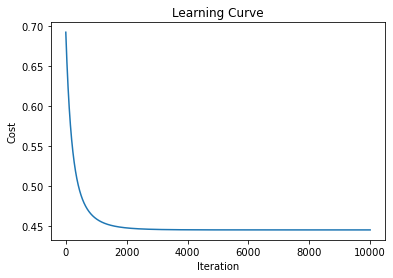

In [55]:
w, b = gradient_descent(X, Y)

In [56]:
test = pd.read_csv('test.csv')

In [57]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
PassengerId = np.array(test['PassengerId'])

In [59]:
test['Age'].replace({
    np.nan : np.sum(test['Age']) / test.shape[0]
}, inplace=True)

In [60]:
test['Age'].unique()

array([34.5       , 47.        , 62.        , 27.        , 22.        ,
       14.        , 30.        , 26.        , 18.        , 21.        ,
       24.04425837, 46.        , 23.        , 63.        , 24.        ,
       35.        , 45.        , 55.        ,  9.        , 48.        ,
       50.        , 22.5       , 41.        , 33.        , 18.5       ,
       25.        , 39.        , 60.        , 36.        , 20.        ,
       28.        , 10.        , 17.        , 32.        , 13.        ,
       31.        , 29.        , 28.5       , 32.5       ,  6.        ,
       67.        , 49.        ,  2.        , 76.        , 43.        ,
       16.        ,  1.        , 12.        , 42.        , 53.        ,
       26.5       , 40.        , 61.        , 60.5       ,  7.        ,
       15.        , 54.        , 64.        , 37.        , 34.        ,
       11.5       ,  8.        ,  0.33      , 38.        , 57.        ,
       40.5       ,  0.92      , 19.        , 36.5       ,  0.75

In [62]:
test['Sex'].replace({
    'male' : 1,
    'female' : 0
}, inplace=True)

In [63]:
test['Sex'].unique()

array([1, 0], dtype=int64)

In [64]:
test['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [65]:
test['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [66]:
X_test = np.array(test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']])

In [75]:
X_test.shape

(418, 5)

In [77]:
# Predicting the training dataset
output_train = []
for i in range(X.shape[0]):
    value = sigmoid(np.dot(X[i], w) + b)
    if value >= 0.65:
        output_train.append(1)
    else:
        output_train.append(0)

In [81]:
count_train = 0
for i in range(Y.shape[0]):
    if output_train[i] != Y[i]:
        count_train += 1

In [82]:
count_train

168

In [83]:
# Finding the accuracy for the training dataset
((X.shape[0]-count_train) / X.shape[0]) * 100

81.14478114478115

In [87]:
mu_X_test = np.mean(X_test, axis=0)
sigma_X_test = np.std(X_test, axis=0)
X_test = (X_test - mu_X_test) / sigma_X_test

In [89]:
output_test = []
for i in range(X_test.shape[0]):
    value_test = sigmoid(np.dot(X_test[i], w) + b)
    if value_test >= 0.65:
        output_test.append(1)
    else:
        output_test.append(0)

In [95]:
output_test = np.array(output_test)

In [96]:
output_test.shape

(418,)

In [97]:
final_df = pd.DataFrame([PassengerId, output_test])

In [99]:
final_df = final_df.T

In [102]:
final_df.rename(columns = {0:'PassengerId', 1:'Survived'}, inplace = True)

In [103]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [104]:
final_df.to_csv('gender_submission.csv', index=False)